# **Dataset Information**
For detailed information about each feature, kindly refer to the [Data Dictionary](data_dict.md)

## **Required Libraries**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Dataset

In [10]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [20]:
df.shape

(1025, 14)

In [4]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [8]:
df.isnull().sum().sum()

0

**In dataset, there is no null value**

In [9]:
corr = df.corr()
abs_corr = abs(corr['target'])
sorted_abs_corr = abs_corr.sort_values(ascending=False)

In [10]:
print(sorted_abs_corr)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


**Here most columns are moderately correlated with each other except for the fbs column, whhich is weakly correlated with the other columns.**

# **EDA Analysis**

In [23]:
target_counts = df['target'].value_counts()
target_counts

,count
target,
1,526
0,499


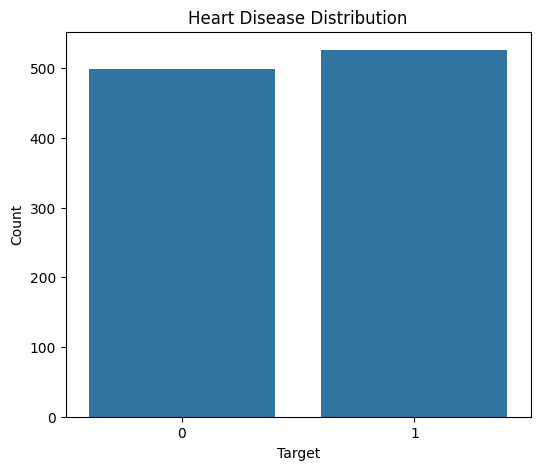

In [24]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='target')
plt.title('Heart Disease Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

**Percentage of target**

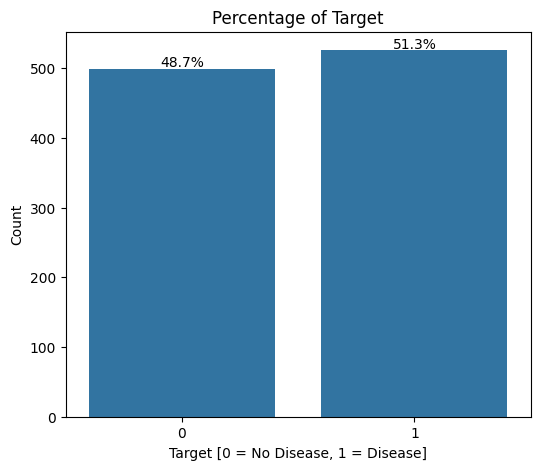

In [25]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='target')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{percentage:.1f}%', ha="center")

plt.title('Percentage of Target')
plt.xlabel('Target [0 = No Disease, 1 = Disease]')
plt.ylabel('Count')
plt.show()

In [26]:
target_percentage = df['target'].value_counts(normalize=True) * 100
print("percentage of patients without heart disease: {:.2f}%".format(target_percentage[0]))
print("percentage of patients with heart disease: {:.2f}%".format(target_percentage[1]))

percentage of patients without heart disease: 48.68%
percentage of patients with heart disease: 51.32%


**Count the Male and Female patients**\
0 - Female
1 - Male

In [27]:
count_female = len(df[df['sex'] == 0])
count_male = len(df[df['sex'] == 1])

print("Number of females:", count_female)
print("Number of males:", count_male)

Number of females: 312
Number of males: 713


In [28]:
print("percentage of female patients: {:.2f}% ".format(count_female/len(df) * 100))
print("percentage of male patients: {:.2f}% ".format(count_male/len(df) * 100))

percentage of female patients: 30.44% 
percentage of male patients: 69.56% 


In [17]:
categorial = [
    ('sex', ['female', 'male']),
    ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']),
    ('fbs', ['fbs < 120mg', 'fbs > 120mg']),
    ('restecg', ['normal', 'ST-T wave', 'left ventricular']),
    ('exang', ['no', 'yes']),
    ('slope', ['upsloping', 'flat', 'downsloping']),
    ('ca', ['0', '1', '2', '3']),
    ('thal', ['normal', 'fixed defect', 'reversible defect']),
    ('target', ['no disease', 'disease'])
]

continuous = [
    ('trestbps', 'blood pressure in mm Hg'),
    ('chol', 'serum cholestoral in mg/d'),
    ('thalach', 'maximum heart rate achieved'),
    ('oldpeak', 'ST depression by exercise relative to rest'),
    ('ca', '# major vessels: (0-3) colored by flourosopy')
]

In [18]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)]
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]

In [19]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=df, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=df, ax=axes[ax_index][1])

    # df['target'] = df.groupby(attribute)['target'].transform('mean')

    sns.barplot(x=attribute, y='target', hue=attribute, data=df, ax=axes[ax_index][2])

    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)

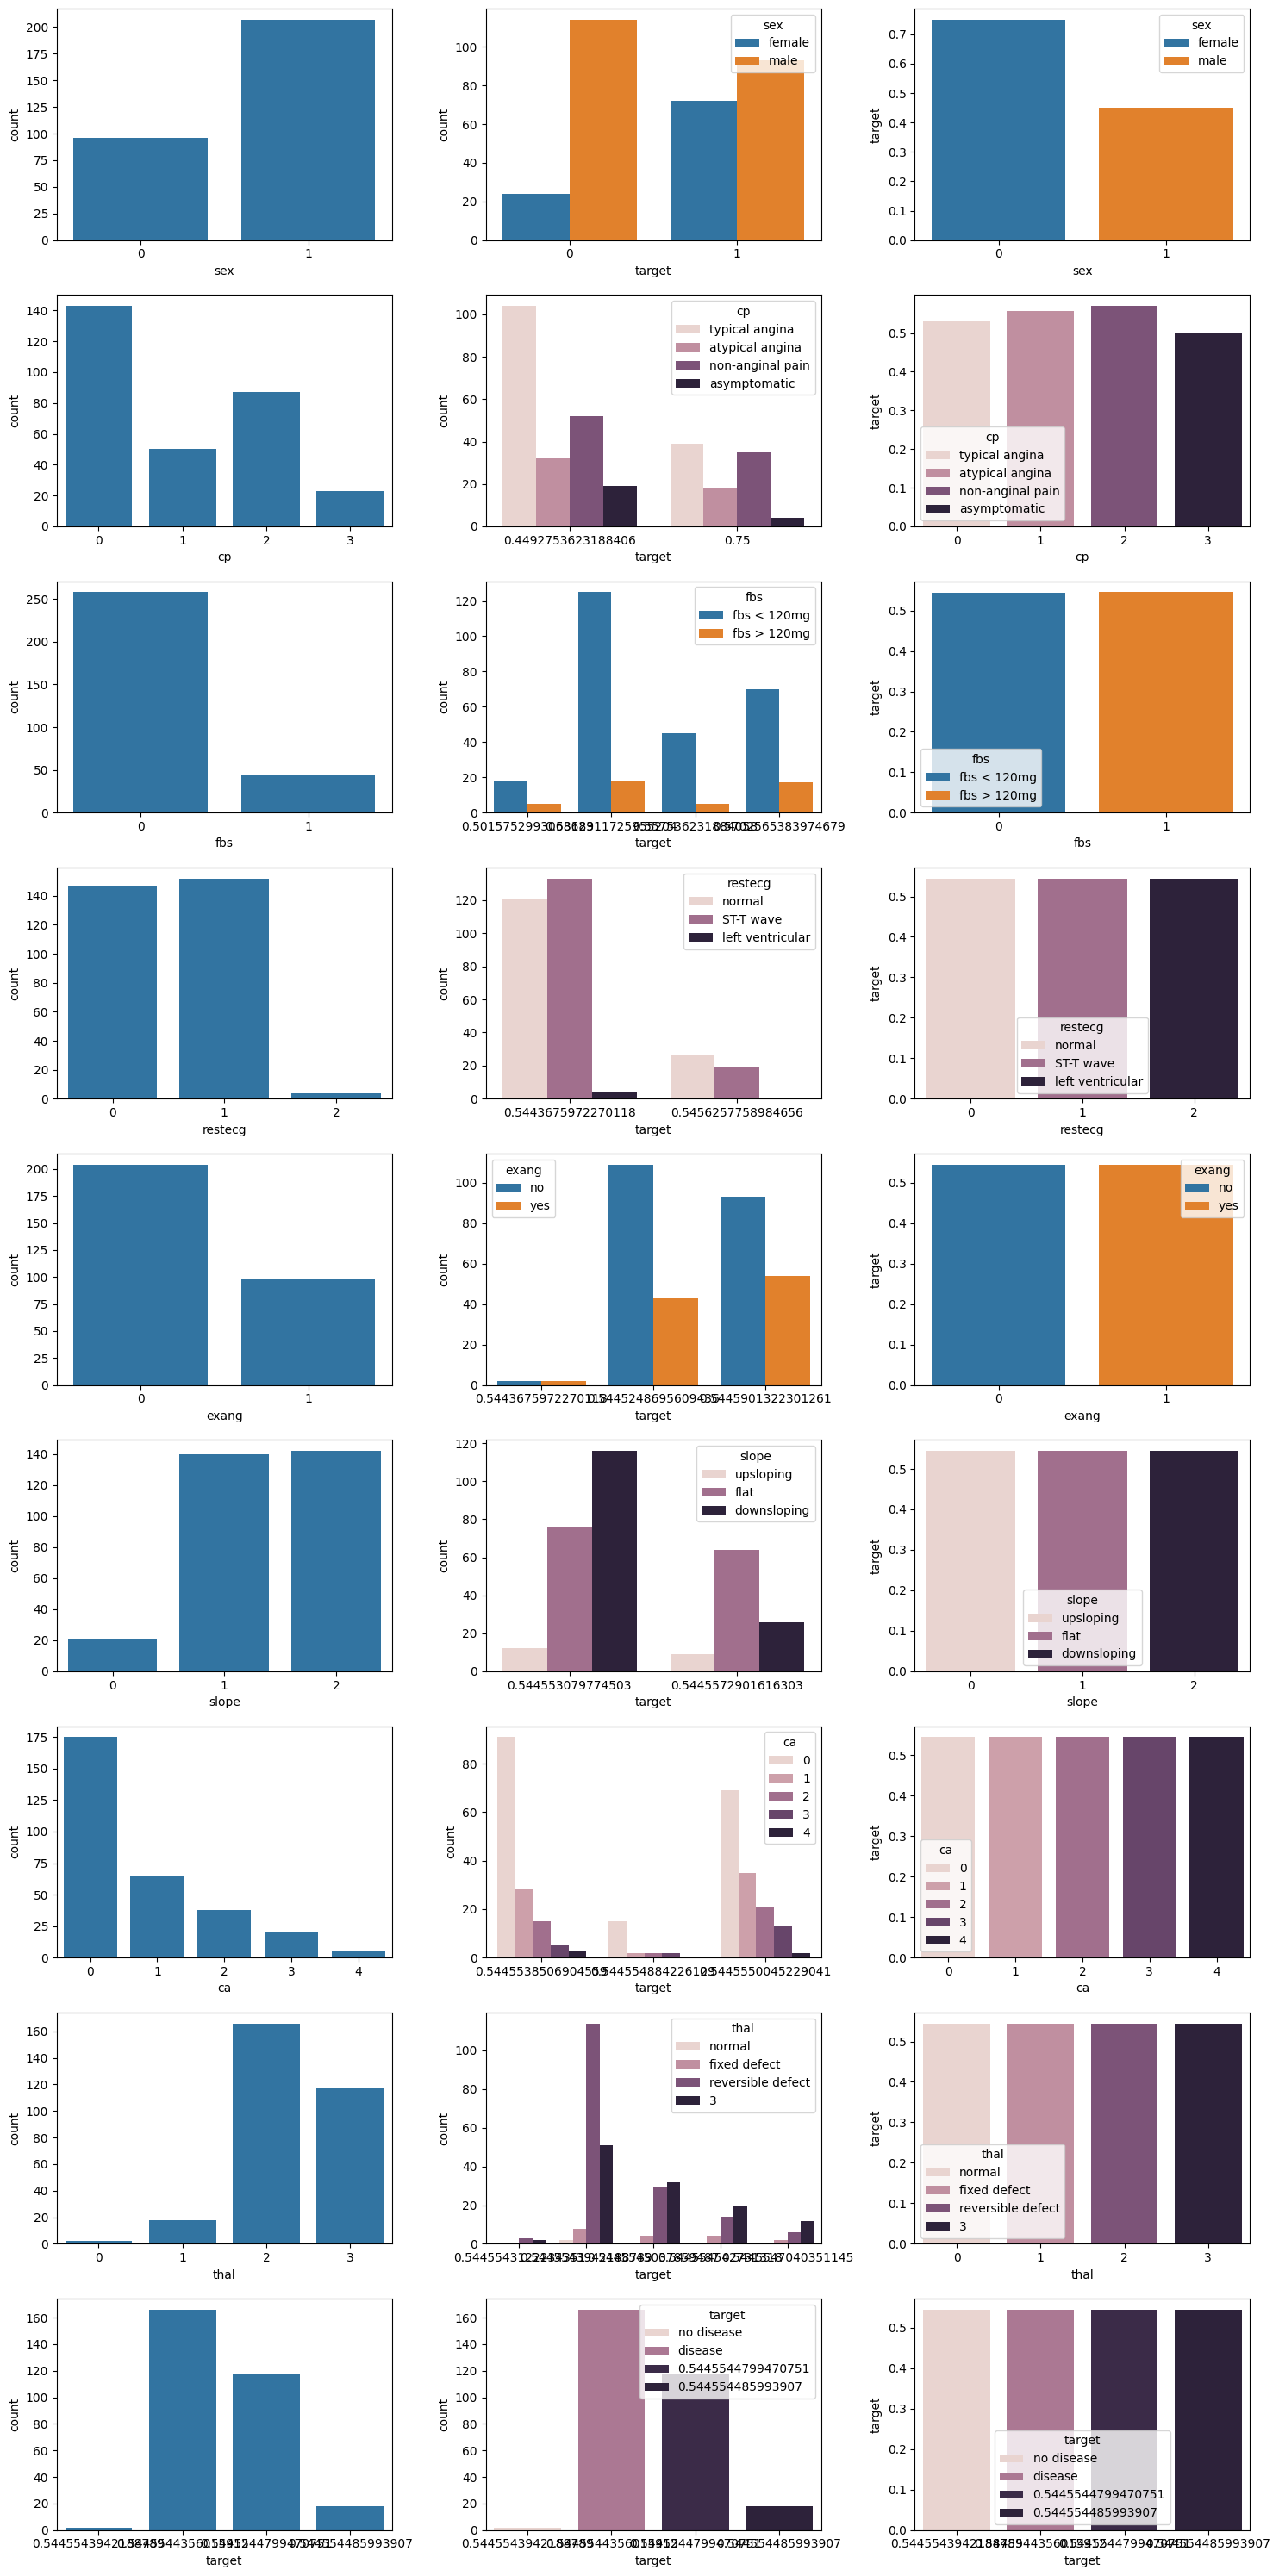

In [20]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))
plotGrid(isCategorial=True)
plt.tight_layout()

In [21]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(df[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=df, ax=axes[ax_index][1])

<ipython-input-21-4e632c5cfca1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[[attribute]], ax=axes[ax_index][0])
<ipython-input-21-4e632c5cfca1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[[attribute]], ax=axes[ax_index][0])
<ipython-input-21-4e632c5cfca1>:2: UserWarning: 

`distp

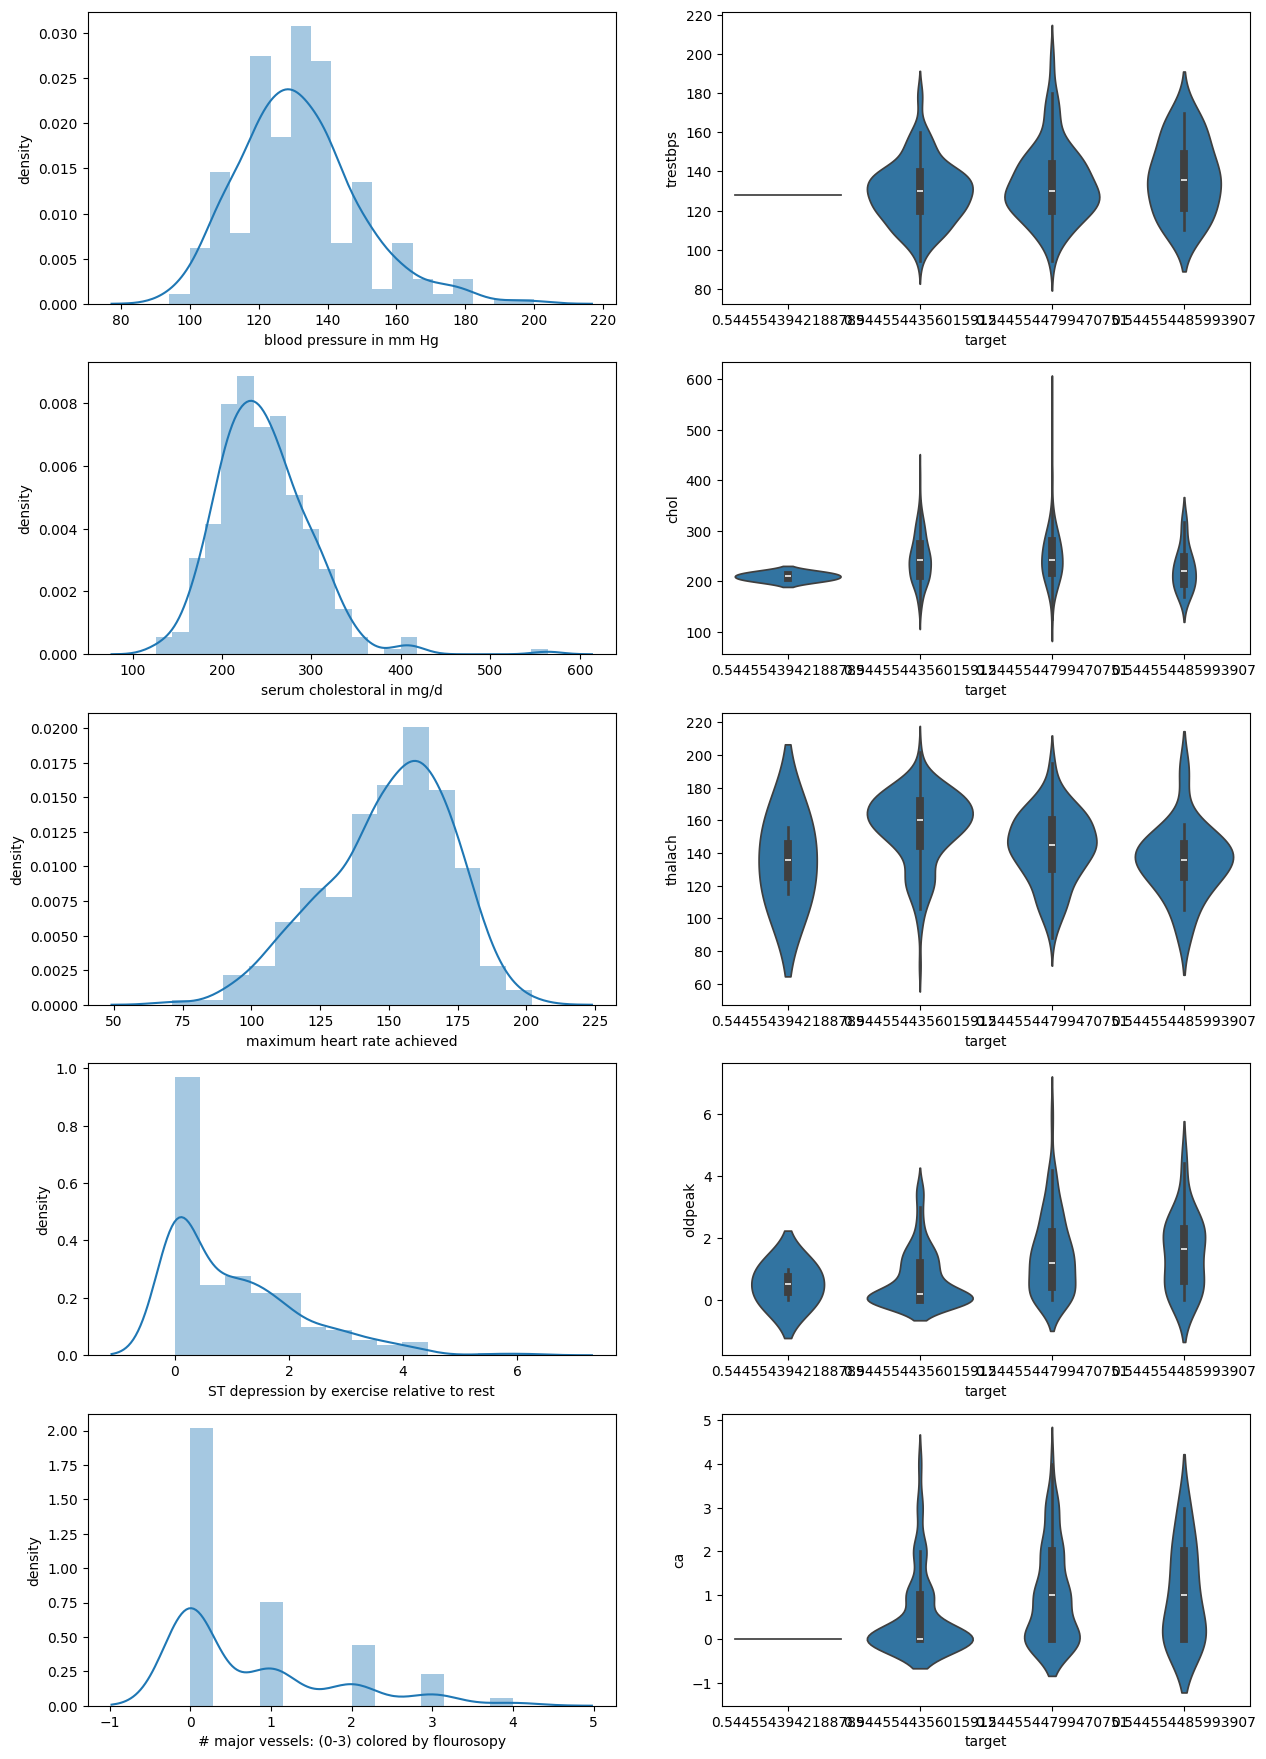

In [22]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))
plotGrid(isCategorial=False)

# **Heart Disease Frequency for ages**

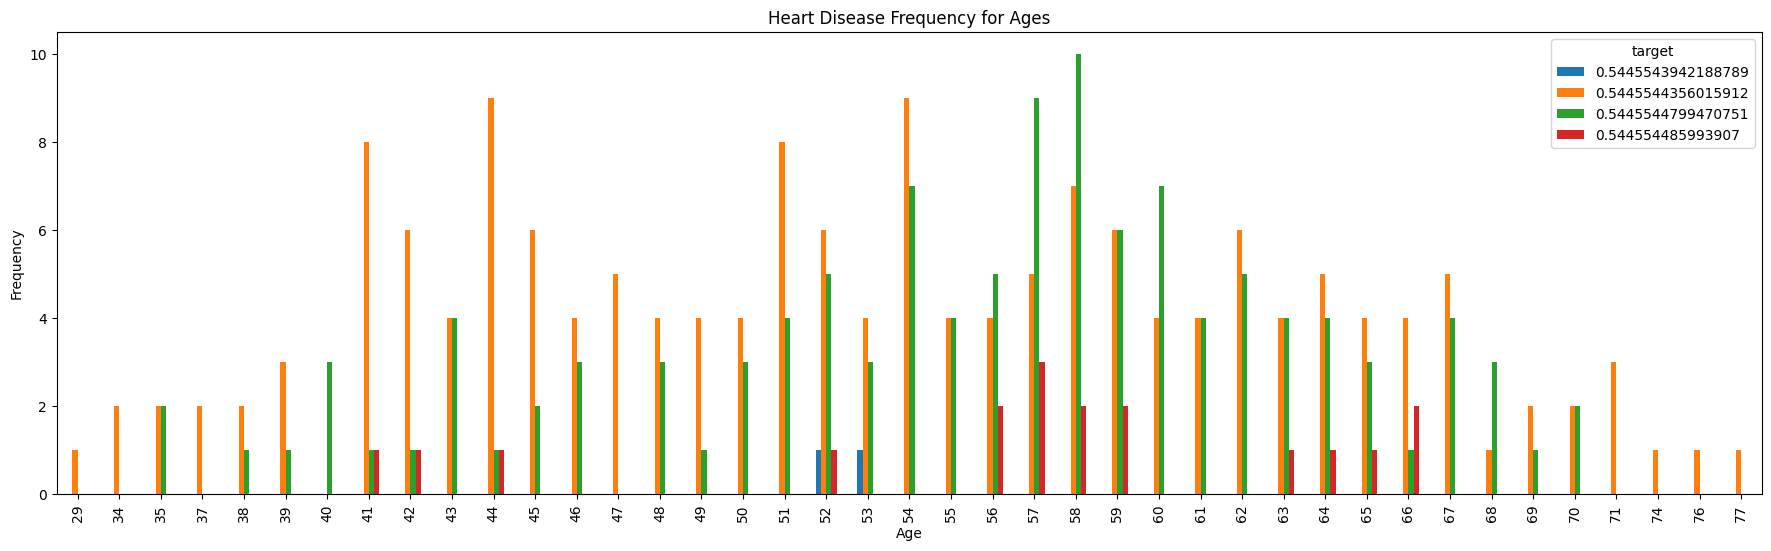

In [23]:
pd.crosstab(df.age, df.target).plot(kind="bar",figsize=(22, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [3]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Heart Disease frequency for sex**
0 - Female\
1 - Male


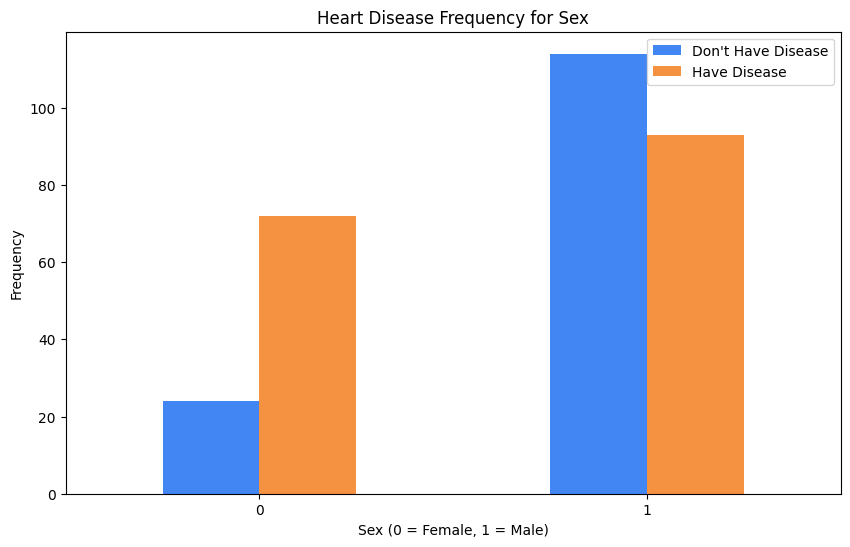

In [37]:
pd.crosstab(df.sex, df.target).plot(kind="bar", figsize=(10, 6),color=['#4286f4','#f49242'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Frequency")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(["Don't Have Disease", "Have Disease"])
plt.show()

# **Heart disease according to Fasting Blood sugar**

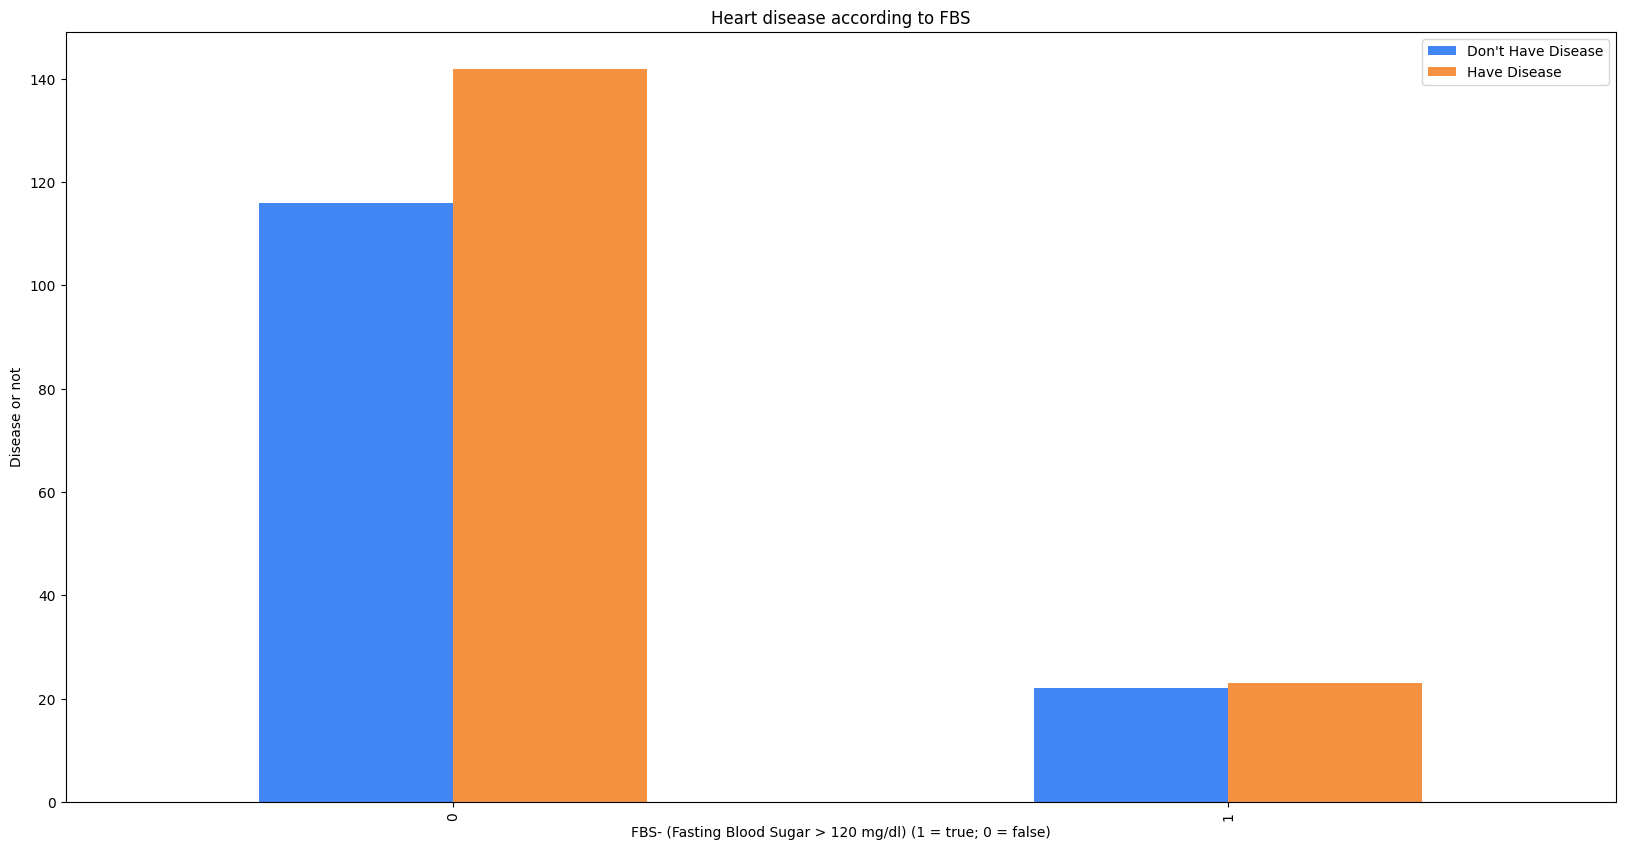

In [38]:
pd.crosstab(df.fasting_blood_sugar, df.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

# **Analysis of chest pain**


4 types of chest pain:  

0: typical angina\
1: atypical angina\
2: non-anginal pain\
3: asymptomatic

In [46]:
df['chest_pain_type'].unique()

array([3, 2, 1, 0])

In [40]:
df['chest_pain_type'].value_counts()

,count
chest_pain_type,
0,143
2,87
1,50
3,23


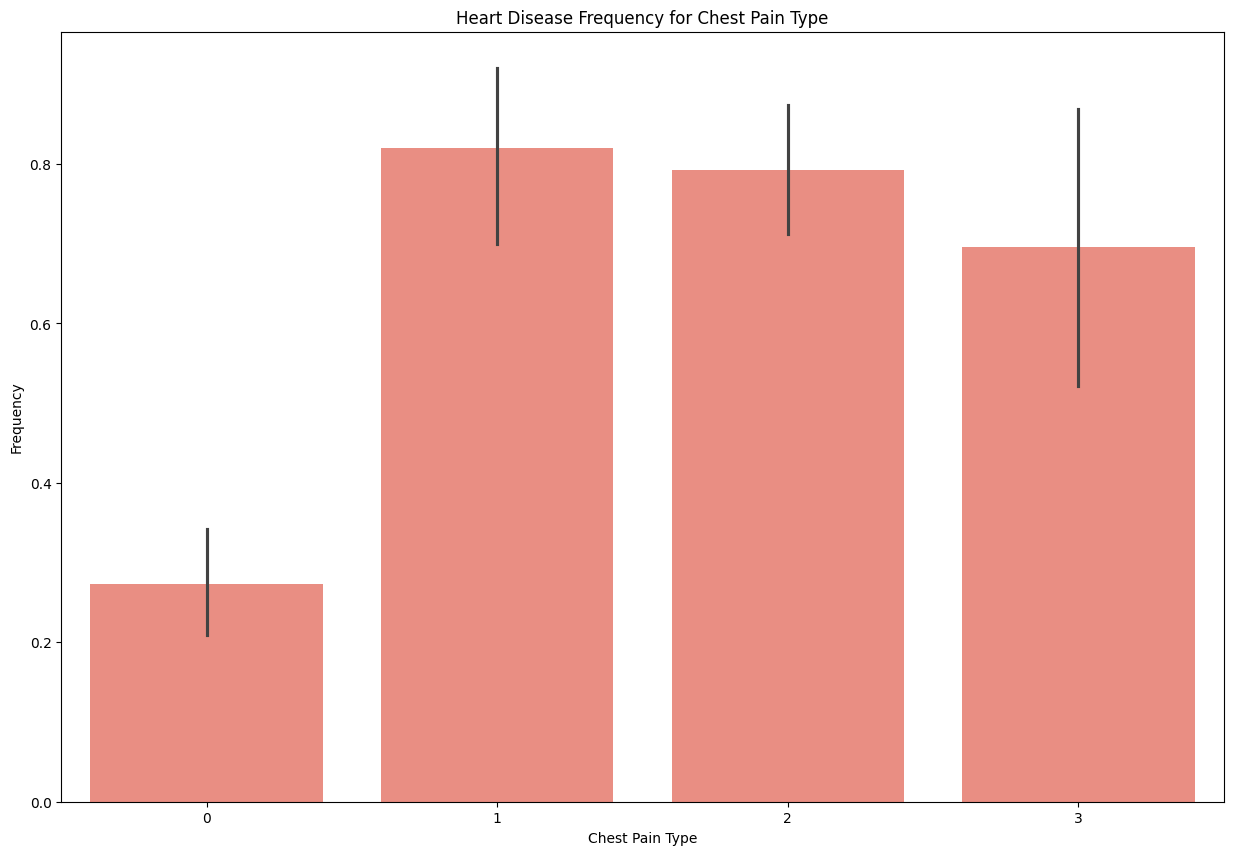

In [45]:
plt.figure(figsize=(15, 10))
sns.barplot(x=df['chest_pain_type'], y=df['target'], data=df, color='salmon')
plt.title("Heart Disease Frequency for Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.show()

# **Analysing The person's resting blood pressure**

In [47]:
df['resting_blood_pressure'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

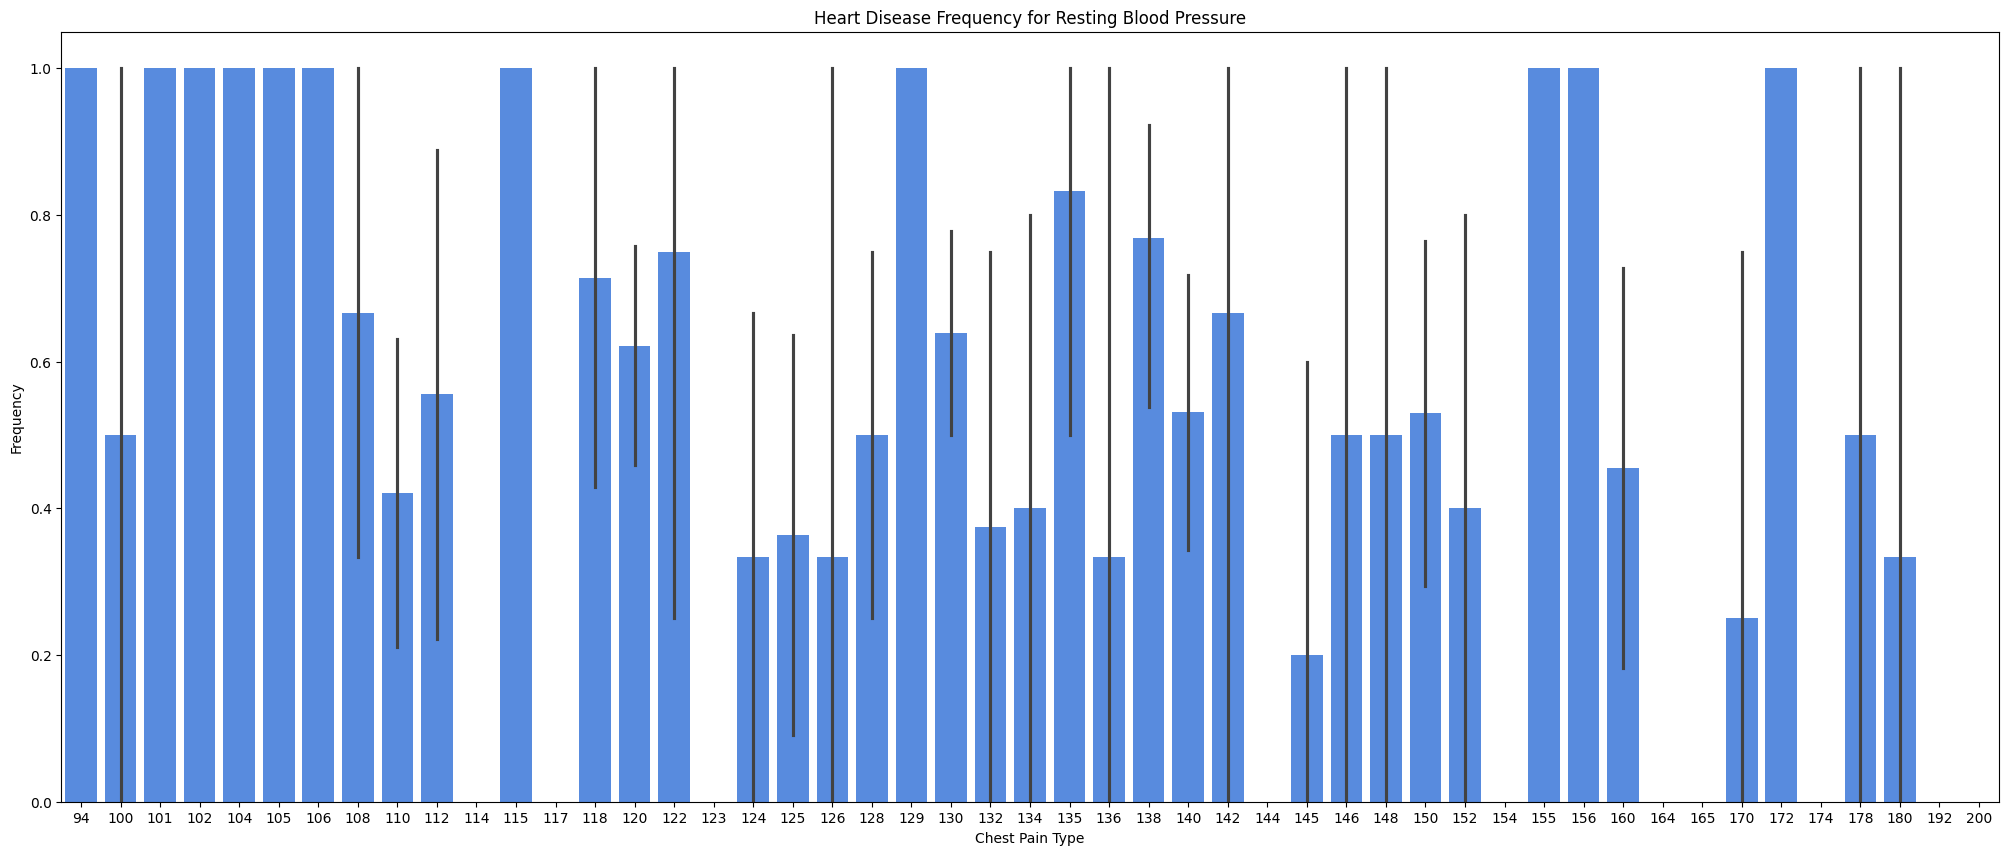

In [53]:
plt.figure(figsize=(25, 10))
sns.barplot(x=df['resting_blood_pressure'], y=df['target'], data=df, color='#4286f4')
plt.title("Heart Disease Frequency for Resting Blood Pressure")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.show()

Analysis on resting electrocardiographic results:
  - 0 = Normal
  - 1 = ST-T wave abnormality (e.g., T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - 2 = Showing probable or definite left ventricular hypertrophy by Estes' criteria

In [54]:
df['rest_ecg'].unique()

array([0, 1, 2])

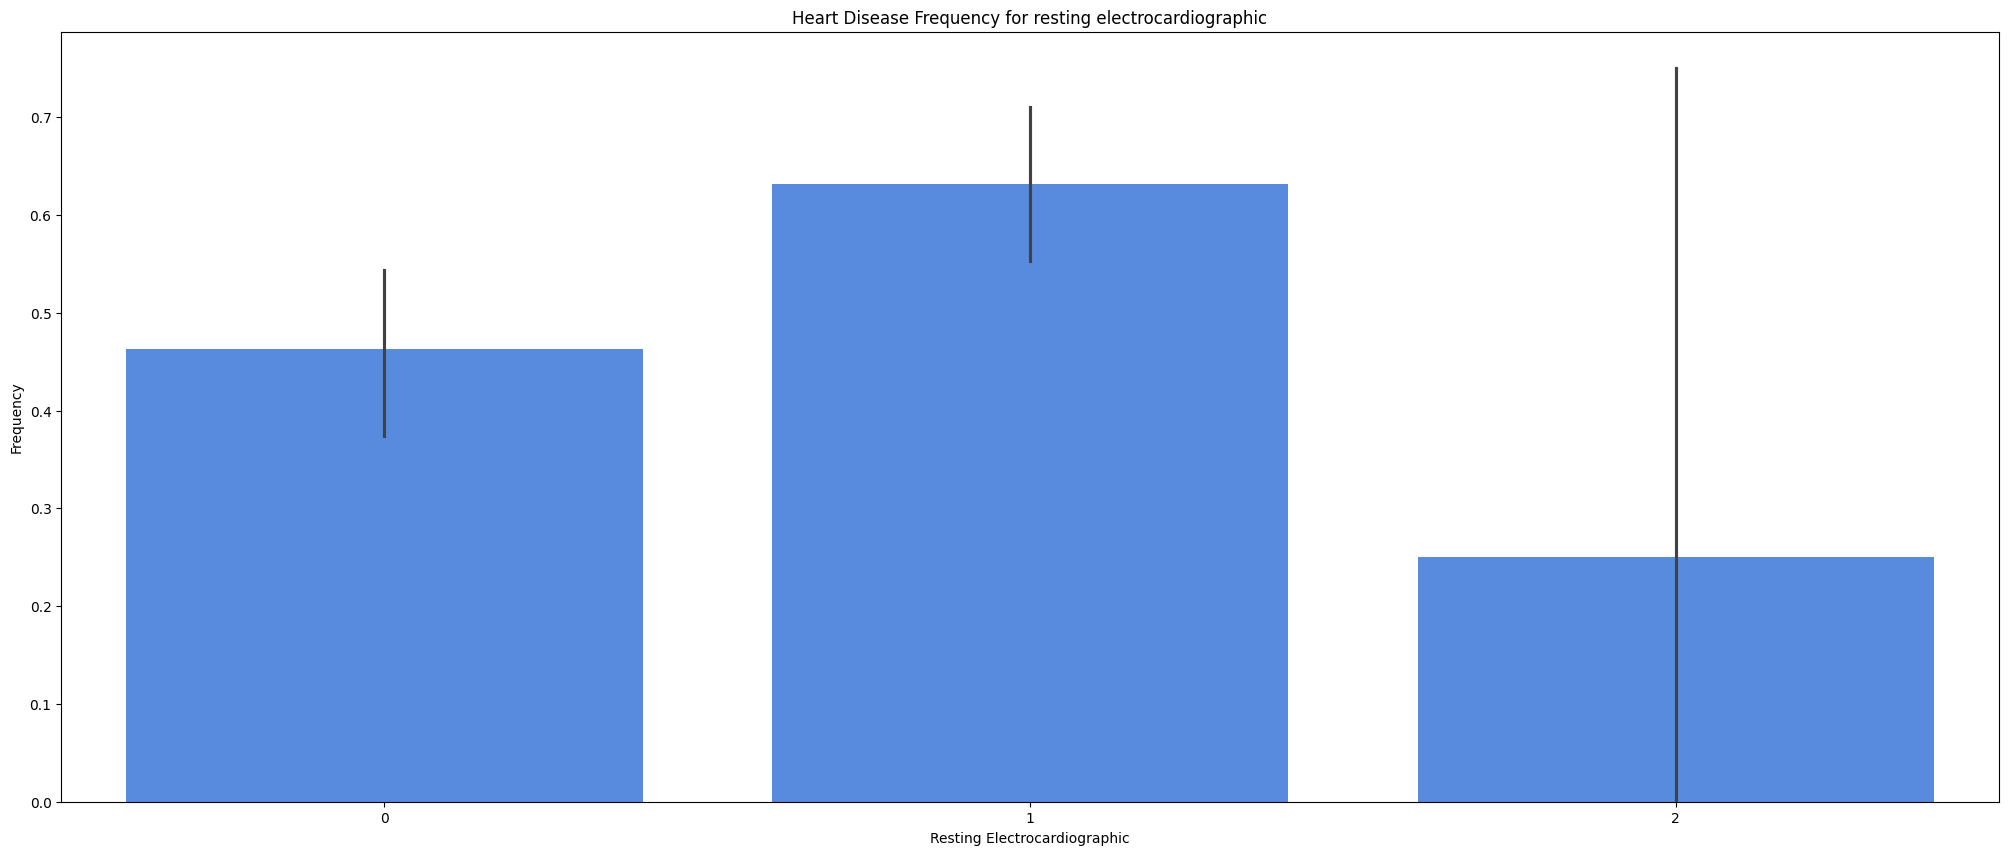

In [58]:
plt.figure(figsize=(25, 10))
sns.barplot(x=df['rest_ecg'], y=df['target'], data=df, color='#4286f4')
plt.title("Heart Disease Frequency for resting electrocardiographic")
plt.xlabel("Resting Electrocardiographic")
plt.ylabel("Frequency")
plt.show()

**people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'**

# **Analysis on Exercise Induced Angina**

1 - Yes\
0 - No

In [59]:
df['exercise_induced_angina'].unique()

array([0, 1])

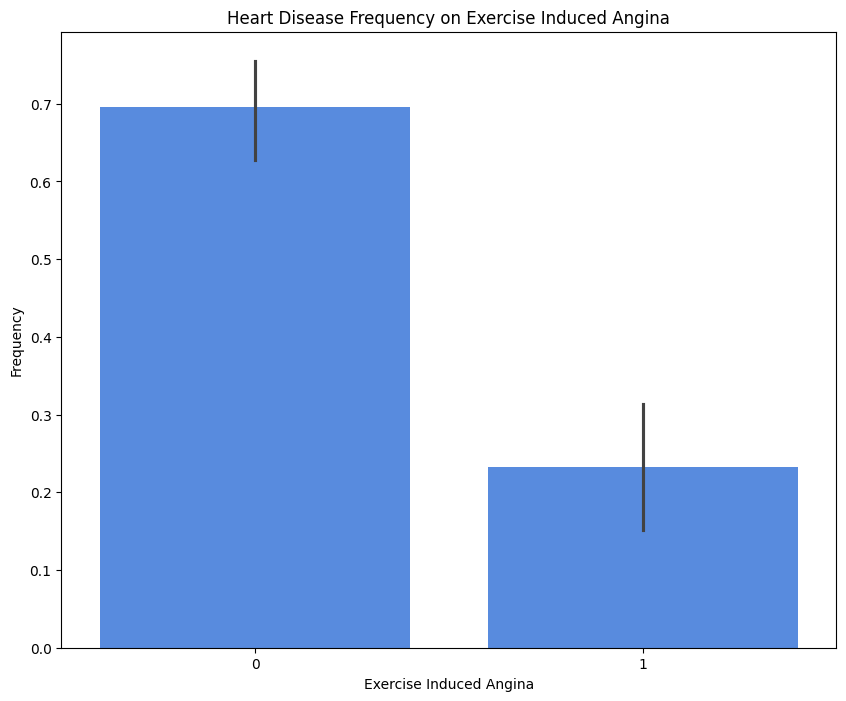

In [62]:
plt.figure(figsize=(10, 8))
sns.barplot(x=df['exercise_induced_angina'], y=df['target'], data=df, color='#4286f4')
plt.title("Heart Disease Frequency on Exercise Induced Angina")
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Frequency")
plt.show()

# **Analysis of the peak exercise ST segement**

0 = Upsloping (Better heart rate with exercise, uncommon)\
1 = Flat (Minimal change, typical healthy heart)\
2 = Downsloping (Signs of an unhealthy heart)

In [6]:
df['st_slope'].unique()

array([0, 2, 1])

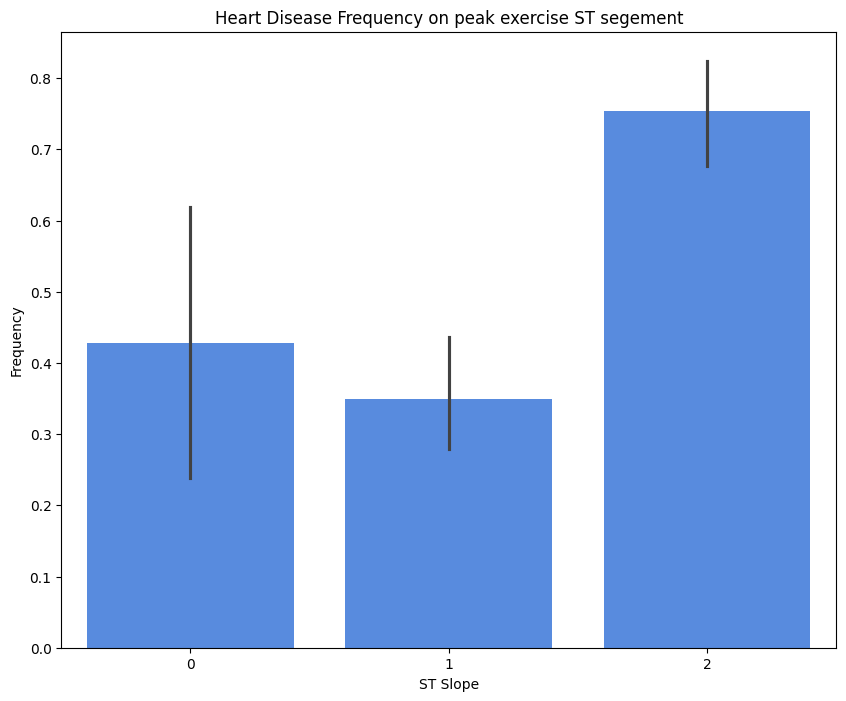

In [7]:
plt.figure(figsize=(10, 8))
sns.barplot(x=df['st_slope'], y=df['target'], data=df, color='#4286f4')
plt.title("Heart Disease Frequency on peak exercise ST segement")
plt.xlabel("ST Slope")
plt.ylabel("Frequency")
plt.show()

# **Analysis on Thalassemia Condition**

3 = Normal\
6 = Fixed defect\
7 = Reversible defect (No proper blood movement during exercise)

In [8]:
df['thalassemia'].unique()

array([1, 2, 3, 0])

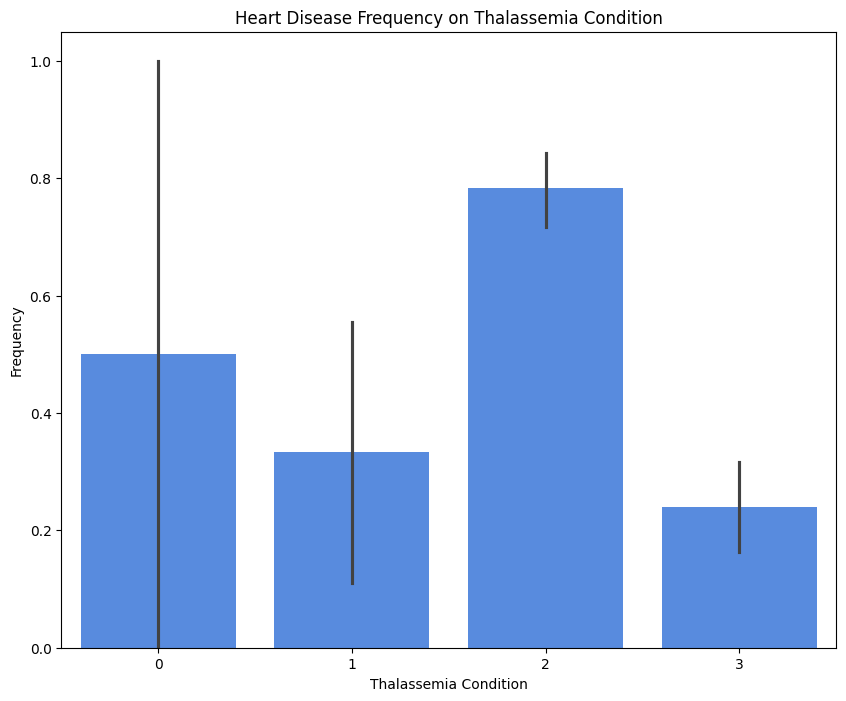

In [9]:
plt.figure(figsize=(10, 8))
sns.barplot(x=df['thalassemia'], y=df['target'], data=df, color='#4286f4')
plt.title("Heart Disease Frequency on Thalassemia Condition")
plt.xlabel("Thalassemia Condition")
plt.ylabel("Frequency")
plt.show()

<ipython-input-10-dfe8ece96ee6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thalassemia'])


<Axes: xlabel='thalassemia', ylabel='Density'>

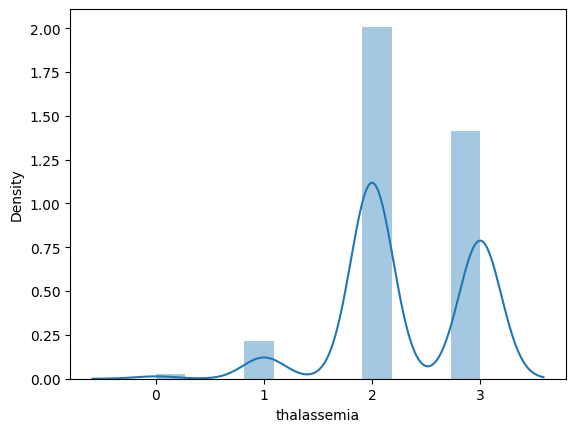

In [10]:
sns.distplot(df['thalassemia'])

# **Analysis on number of major vassels coloured by fluoroscopy**

In [11]:
df['num_major_vessels'].unique()

array([0, 2, 1, 3, 4])

<Axes: xlabel='num_major_vessels', ylabel='target'>

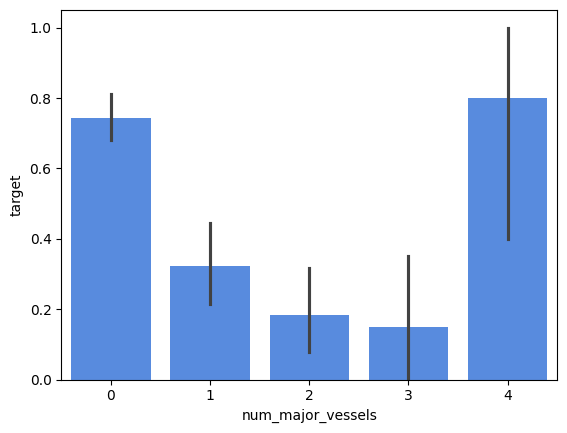

In [14]:
sns.barplot(x=df['num_major_vessels'], y=df['target'], data=df, color='#4286f4')

<Axes: xlabel='num_major_vessels', ylabel='count'>

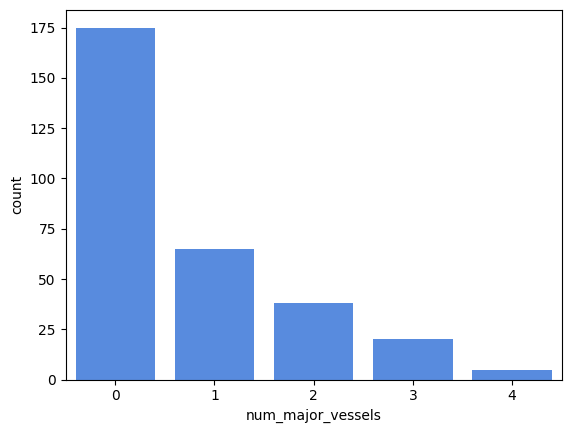

In [15]:
sns.countplot(x=df['num_major_vessels'], data=df, color='#4286f4')

# **Correlation Plot**

In [4]:
corr_of_num = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']

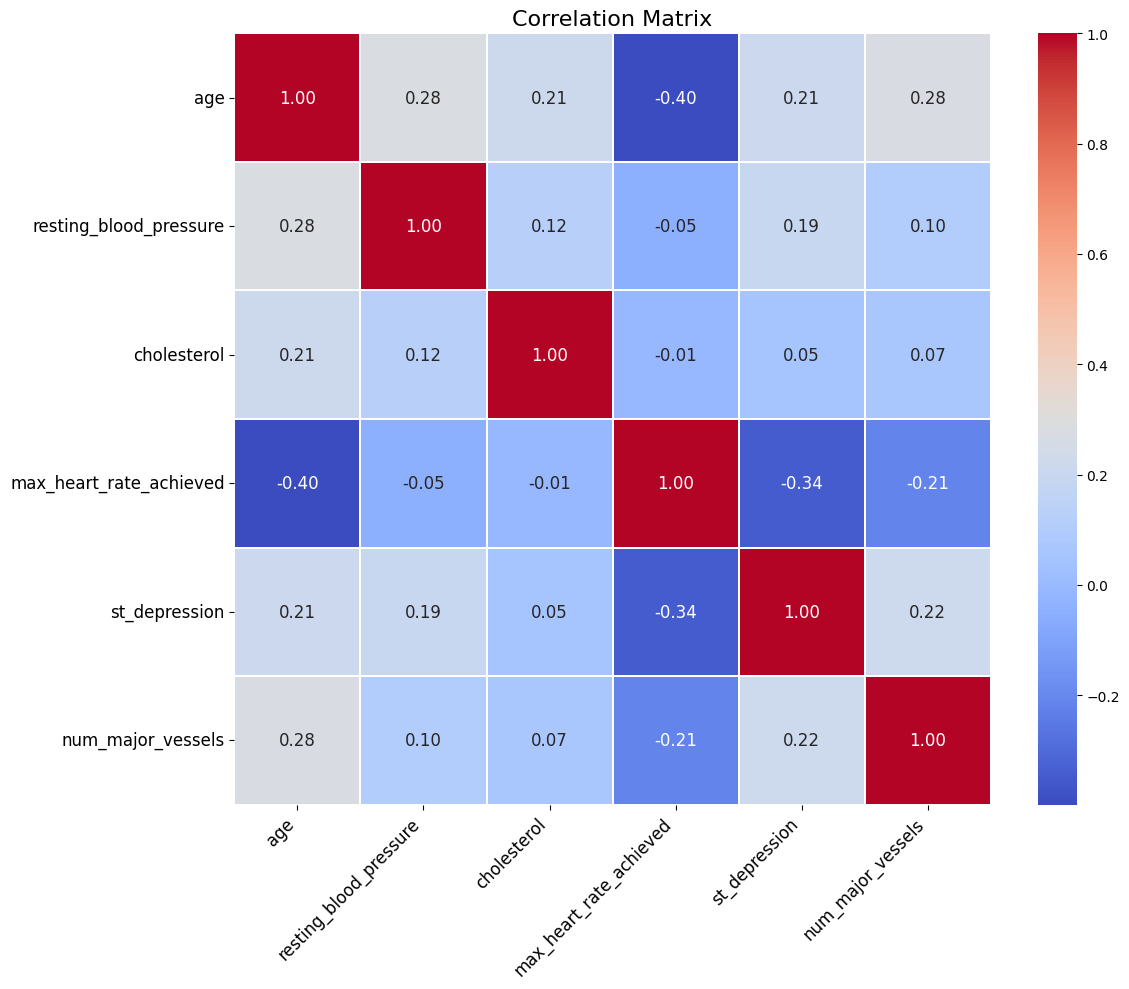

In [8]:
fig, axes = plt.subplots(figsize=(12, 10))

# Correlation plot
df_corr = df.loc[:, corr_of_num]

# Generate correlation matrix
corr = df_corr.corr()

# Plot using seaborn library
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.1, fmt=".2f", annot_kws={"size": 12})
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# **Splitting the dataset into training and testing set**

In [18]:
from sklearn.model_selection import train_test_split

# to find the accuracy score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
new_df = df.drop("target", axis=1)
target = df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(new_df, target, test_size=0.20, random_state=0)
print(f"Training features record: {X_train.shape[0]} \nTesting features record: {X_test.shape[0]}")

Training features record: 820 
Testing features record: 205


In [16]:
[X_train.shape, X_test.shape]

[(820, 13), (205, 13)]

# **Modeling and Training**

In [39]:
def train_model(X_train, Y_train, X_test, Y_test, classifier, **kwargs):
    """
    Trains a given classifier and evaluates its performance.

    Args:
        X_train: Training features.
        Y_train: Training target variable.
        X_test: Testing features.
        Y_test: Testing target variable.
        classifier: The classifier to be trained.
        **kwargs: Keyword arguments to be passed to the classifier's constructor.

    Returns:
        The trained model.
    """

    model = classifier(**kwargs)

    # Train the model
    model.fit(X_train, Y_train)

    # Check accuracy and print out the results
    train_accuracy = model.score(X_train, Y_train)
    test_accuracy = model.score(X_test, Y_test)

    print(f"Train accuracy: {train_accuracy:.4%}")
    print(f"Test accuracy: {test_accuracy:.4%}")

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Generate a classification report
    report = classification_report(Y_test, y_pred)
    print("\nClassification Report:\n", report)

    # Generate a confusion matrix
    cm = confusion_matrix(Y_test, y_pred)
    print("\nConfusion Matrix:\n", cm)

    print(f"\nAccuracy Score: {accuracy_score(Y_test, y_pred):.4%}\n")
    return model

## **Logistic Regression**

In [42]:
from sklearn.linear_model import LogisticRegression

logistic_model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression, max_iter=100000, random_state=0)

Train accuracy: 86.2195%
Test accuracy: 86.3415%

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205


Confusion Matrix:
 [[ 77  21]
 [  7 100]]

Accuracy Score: 86.3415%



In [49]:
# using newton-cg optimizer
model = LogisticRegression(random_state=0, solver='newton-cg').fit(X_test, Y_test)
log_lr_score = model.score(X_test, Y_test)
print(f"Accuracy: {log_lr_score:.4%}")

Accuracy: 89.2683%


In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_test, Y_test, cv=10)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.85714286 0.85714286 0.76190476 0.85714286 0.85714286 0.95
 0.8        0.85       0.95       0.9       ]
Mean accuracy: 0.864047619047619


### learning curve between training and cross validation score

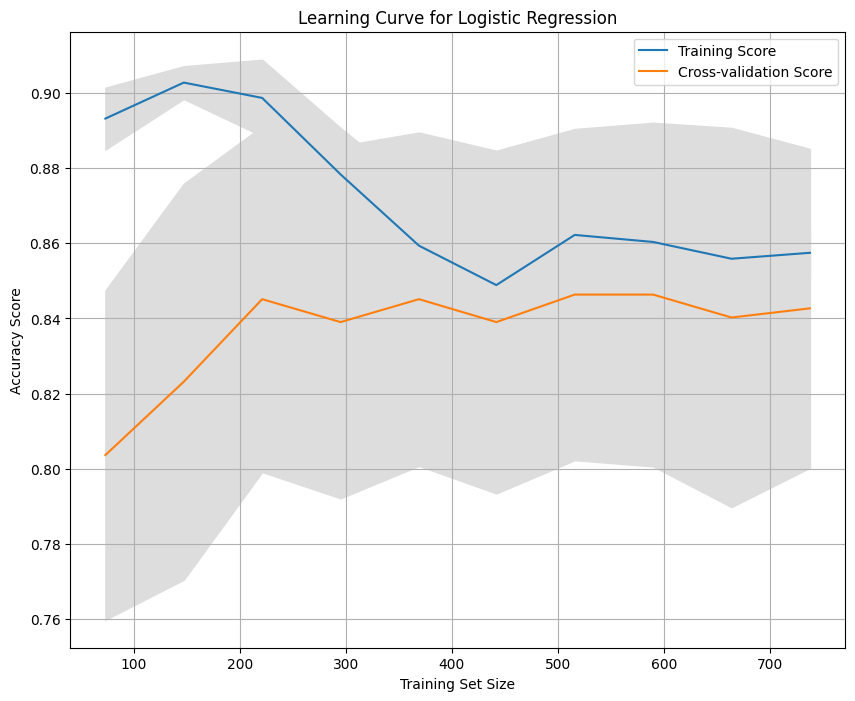

In [54]:
from sklearn.model_selection import learning_curve

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    logistic_model, X_train, Y_train, cv=10, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 8))

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-validation Score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()

## **Random Forest**

In [58]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = train_model(X_train, Y_train, X_test, Y_test, RandomForestClassifier,
n_estimators=100, max_depth=5, random_state=0)

Train accuracy: 94.3902%
Test accuracy: 95.1220%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        98
           1       0.93      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205


Confusion Matrix:
 [[ 90   8]
 [  2 105]]

Accuracy Score: 95.1220%



### **Learning curve between training and cross validation score**

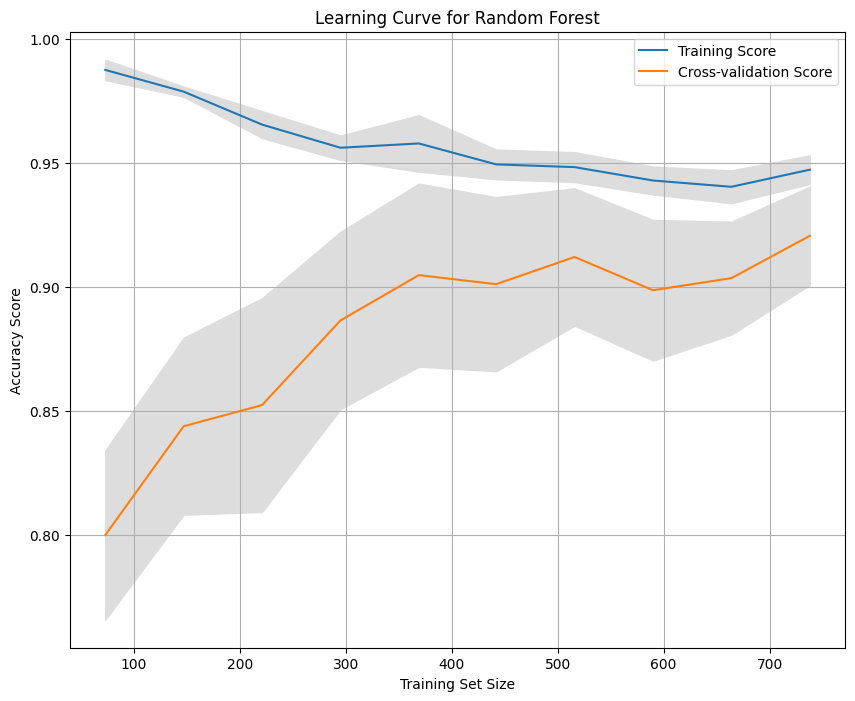

In [60]:
from sklearn.model_selection import learning_curve

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    random_forest_model, X_train, Y_train, cv=10, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 8))

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-validation Score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()

## **Naive Bayes**

In [61]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 82.0732%
Test accuracy: 85.3659%

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205


Confusion Matrix:
 [[79 19]
 [11 96]]

Accuracy Score: 85.3659%



### **learning curve between training and cross validation score**

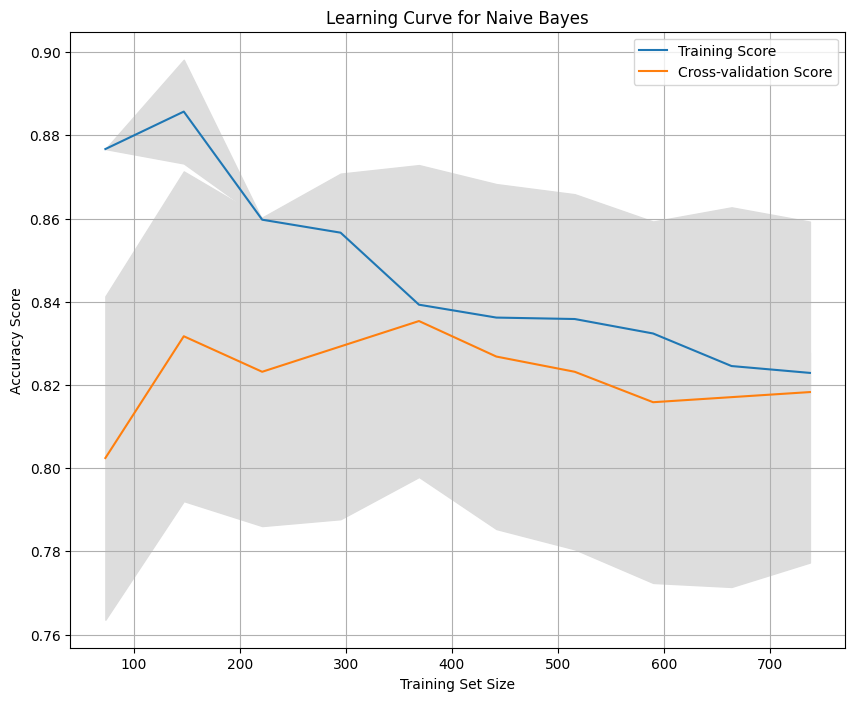

In [66]:
from sklearn.model_selection import learning_curve

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    naive_bayes_model, X_train, Y_train, cv=10, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 8))

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-validation Score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

plt.title('Learning Curve for Naive Bayes')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()

## **K-Nearest Neighbor**

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=10)

Train accuracy: 77.0732%
Test accuracy: 79.5122%

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80        98
           1       0.84      0.76      0.79       107

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205


Confusion Matrix:
 [[82 16]
 [26 81]]

Accuracy Score: 79.5122%



### **Learning curve between training and cross validation score**

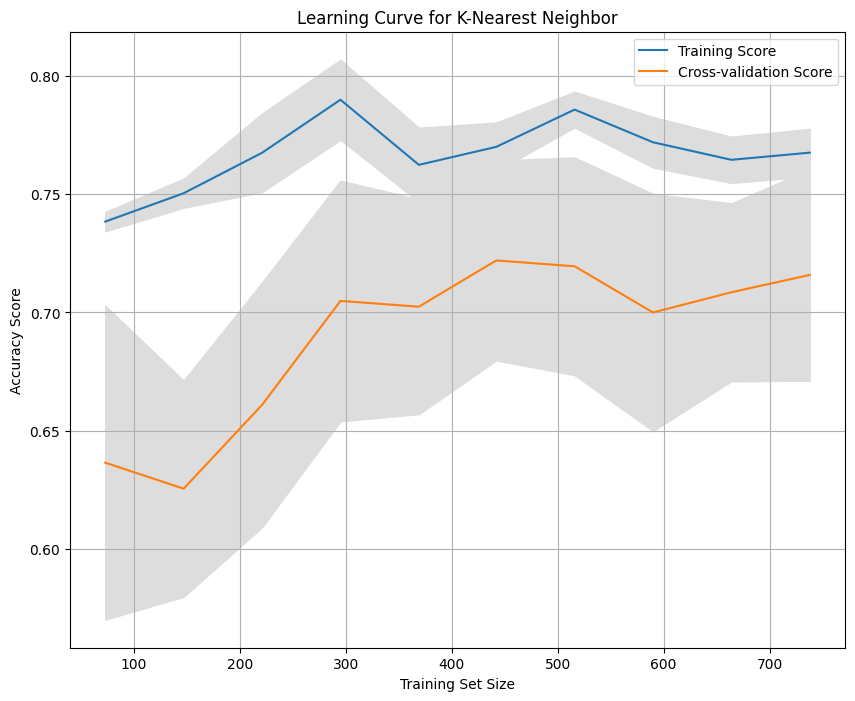

In [67]:
from sklearn.model_selection import learning_curve

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    knn_model, X_train, Y_train, cv=10, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 8))

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-validation Score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

plt.title('Learning Curve for K-Nearest Neighbor')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()

## **Support Vector Machine**

In [68]:
from sklearn.svm import SVC

svm_model = train_model(X_train, Y_train, X_test, Y_test, SVC, kernel='linear', random_state=0)

Train accuracy: 83.4146%
Test accuracy: 83.9024%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82        98
           1       0.80      0.92      0.86       107

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205


Confusion Matrix:
 [[74 24]
 [ 9 98]]

Accuracy Score: 83.9024%



In [69]:
svm_model = train_model(X_train, Y_train, X_test, Y_test, SVC, kernel='rbf', random_state=0)

Train accuracy: 70.2439%
Test accuracy: 74.6341%

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.72        98
           1       0.73      0.81      0.77       107

    accuracy                           0.75       205
   macro avg       0.75      0.74      0.74       205
weighted avg       0.75      0.75      0.74       205


Confusion Matrix:
 [[66 32]
 [20 87]]

Accuracy Score: 74.6341%



In [72]:
# Using SGD optimizer
from sklearn.linear_model import SGDClassifier
svm_model = train_model(X_train, Y_train, X_test, Y_test, SGDClassifier, loss='hinge', random_state=0)

Train accuracy: 76.2195%
Test accuracy: 80.4878%

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.68      0.77        98
           1       0.76      0.92      0.83       107

    accuracy                           0.80       205
   macro avg       0.82      0.80      0.80       205
weighted avg       0.82      0.80      0.80       205


Confusion Matrix:
 [[67 31]
 [ 9 98]]

Accuracy Score: 80.4878%



## **Final Score**

In [75]:
import pandas as pd

knn_accuracy = knn_model.score(X_test, Y_test)
logistic_accuracy = logistic_model.score(X_test, Y_test)
nb_accuracy = naive_bayes_model.score(X_test, Y_test)
rf_accuracy = random_forest_model.score(X_test, Y_test)

accuracy_data = {
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forests'],
    'Accuracy': [knn_accuracy, logistic_accuracy, nb_accuracy, rf_accuracy]
}

accuracy_df = pd.DataFrame(accuracy_data)
accuracy_df

,Model,Accuracy
0,KNN,0.795122
1,Logistic Regression,0.863415
2,Naive Bayes,0.853659
3,Random Forests,0.951220


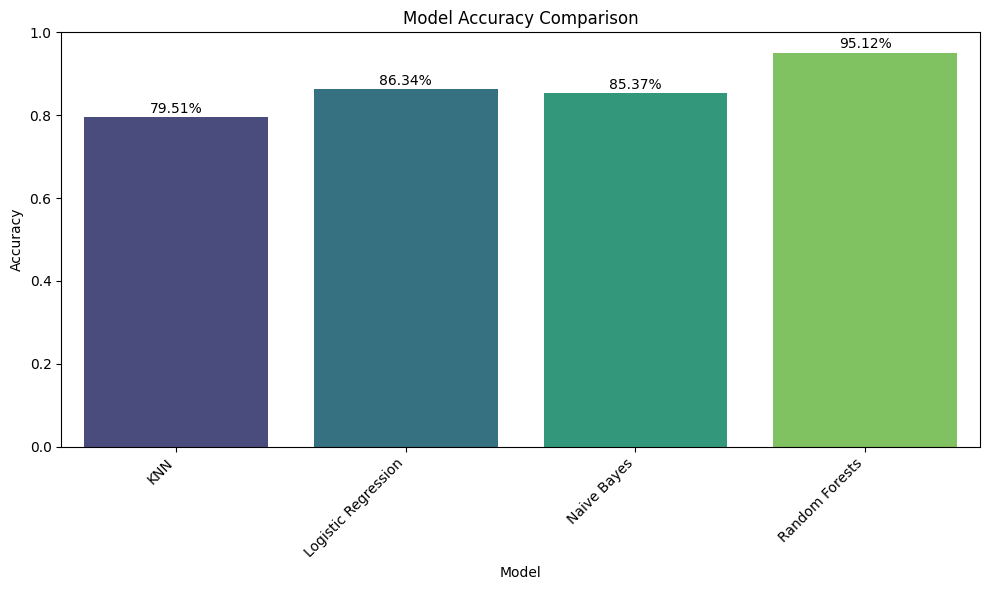

In [82]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, hue='Model', palette='viridis', dodge=False, legend=False)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.02, f'{height:.2%}', ha='center', va='center')

plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()